In [1]:
import os
import keras
import csv
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

Using TensorFlow backend.


In [2]:
WIDTH = 320
HEIGHT = 320
num_classes = 4

In [3]:
def read_data(filepath):
    """
    Reads and returns the data from csv file.
    
    Assumes that the first row is column names.

    Parameters
    ----------
    filepath : str
        File path of the file to be read

    Returns
    -------
    (column_names, data)
        Tuple of names of the columns and the data.
    """
    data = []
    column_names = []
    
    with open(filepath, 'rt') as csvfile:
        data_reader = csv.reader(csvfile, delimiter=',')
        flag = False
        for row in data_reader:
            if not flag:
                column_names = row
                flag = True
            else:
                data.append(row)

    return (column_names, data)

In [4]:
train_csv_path = os.path.join(os.getcwd(), 'CheXpert-v1.0-small/train.csv')
column_names, data = read_data(train_csv_path)

In [5]:
column_names[5:]

['No Finding',
 'Enlarged Cardiomediastinum',
 'Cardiomegaly',
 'Lung Opacity',
 'Lung Lesion',
 'Edema',
 'Consolidation',
 'Pneumonia',
 'Atelectasis',
 'Pneumothorax',
 'Pleural Effusion',
 'Pleural Other',
 'Fracture',
 'Support Devices']

In [6]:
def get_X(filepaths, cur_dir, num_images=None):
    """
    Reads each image as np array for model training
    
    Parameters
    ----------
    filepaths : array
        a list of file paths of the images 
    cur_dir : str
        the current directory

    Returns
    -------
    np.array
        an array of images 
    """
    X = []
    for path in filepaths[:num_images]:
        img = cv2.imread(os.path.join(cur_dir, path), 0)
        X.append(cv2.resize(img, (WIDTH, HEIGHT), interpolation=cv2.INTER_CUBIC))
    return np.array(X)

In [7]:
filepaths = np.array(data)[:, 0]
filepaths[:10]

array(['CheXpert-v1.0-small/train/patient00001/study1/view1_frontal.jpg',
       'CheXpert-v1.0-small/train/patient00002/study2/view1_frontal.jpg',
       'CheXpert-v1.0-small/train/patient00002/study1/view1_frontal.jpg',
       'CheXpert-v1.0-small/train/patient00002/study1/view2_lateral.jpg',
       'CheXpert-v1.0-small/train/patient00003/study1/view1_frontal.jpg',
       'CheXpert-v1.0-small/train/patient00004/study1/view1_frontal.jpg',
       'CheXpert-v1.0-small/train/patient00004/study1/view2_lateral.jpg',
       'CheXpert-v1.0-small/train/patient00005/study1/view1_frontal.jpg',
       'CheXpert-v1.0-small/train/patient00005/study1/view2_lateral.jpg',
       'CheXpert-v1.0-small/train/patient00005/study2/view1_frontal.jpg'],
      dtype='<U64')

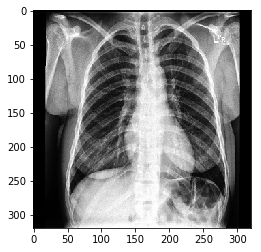

In [8]:
X_train = get_X(filepaths, os.getcwd(), 1000)
plt.imshow(X_train[5], cmap='gray')

In [9]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Implementation has been take from this gist:
    (https://gist.github.com/soply/f3eec2e79c165e39c9d540e916142ae1)
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

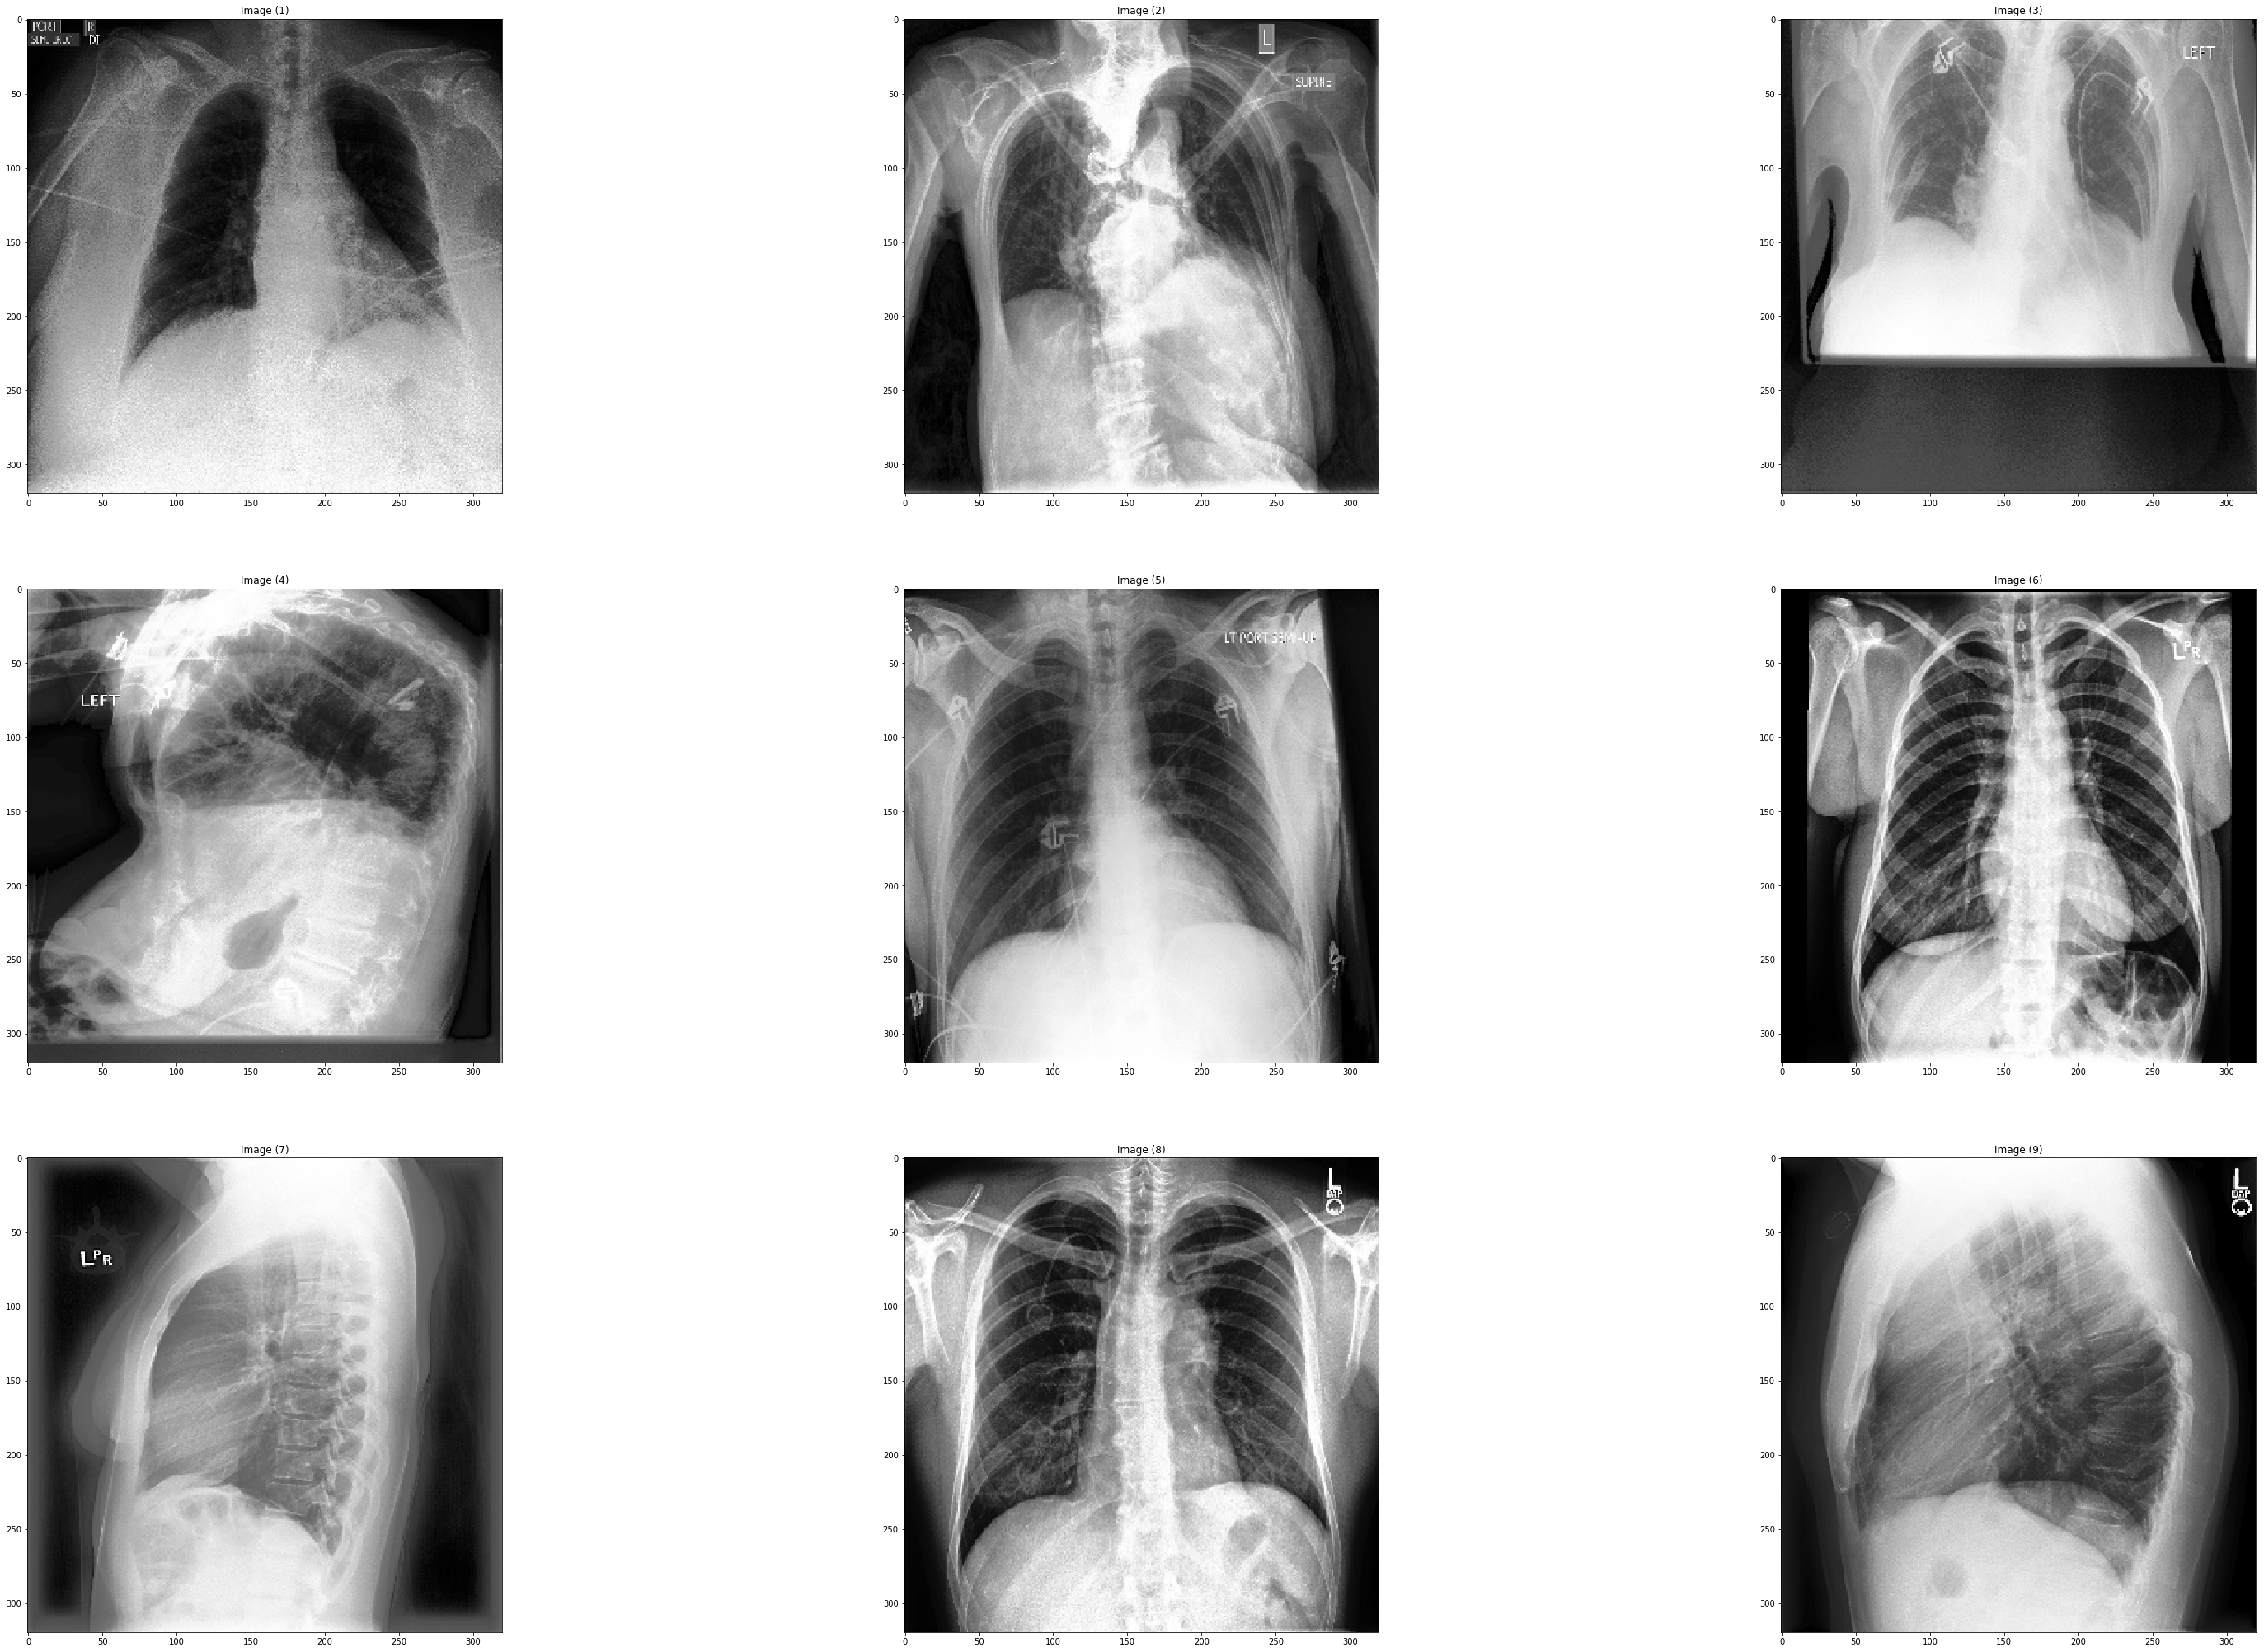

In [10]:
show_images(X_train[:9], cols=3)

In [6]:
print(column_names[7])
y_cardiomegaly = np.array(data)[:, 7]

def preprocess_y(raw_y):
    raw_y[raw_y == ''] = -2
    raw_y = raw_y.astype(float)
    y = raw_y.astype(int)
    return y

y_cardiomegaly = preprocess_y(y_cardiomegaly)
y = y_cardiomegaly

Cardiomegaly


In [9]:
y

array([-2, -1, -2, ..., -2,  1, -2])

In [8]:
keras.utils.to_categorical(y, num_classes=4)

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [44]:
valid_csv_path = os.path.join(os.getcwd(), 'CheXpert-v1.0-small/valid.csv')
column_names_, valid_data = read_data(valid_csv_path)

In [13]:
column_names_[7]

'Cardiomegaly'

In [14]:
valid_data = np.array(valid_data)

In [18]:
y_valid = preprocess_y(valid_data[:, 7])

In [21]:
keras.utils.to_categorical(y_valid, num_classes=4)

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],


In [12]:
import numpy as np
import keras

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, 
                 list_IDs, 
                 labels, 
                 batch_size=32, 
                 dim=(320, 320), 
                 n_channels=1,
                 n_classes=10, 
                 shuffle=True):
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()
        
    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))
    
    def __getitem__(self, index):
        'Generate one batch of data'
        # generates the indexes of the batch
        indexes = self.indexes[index * self.batch_size: (index + 1) * self.batch_size]
        
        # find the list of ids
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
        # print(list_IDs_temp)
        
        # data generation
        X, y = self.__data_generation(list_IDs_temp)
        
        return X, y
    
    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == False:
            np.random.shuffle(self.indexes)
    
    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)
        
        cur_dir = os.getcwd()
        
        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample

            img = cv2.imread(os.path.join(cur_dir, ID), 0)
            img = cv2.resize(img, (WIDTH, HEIGHT), interpolation=cv2.INTER_CUBIC)
        
            X[i, ] = img.reshape((320, 320, 1)) / 255
            
            # store the class 
            y[i] = self.labels[ID]
        
        return X, keras.utils.to_categorical(y, num_classes=self.n_classes)

In [13]:
params = {'dim': (320, 320),
        'batch_size': 32,
        'n_classes': 4,
        'n_channels': 1,
        'shuffle': True} 

partition = {
    'train': [],
    'validation': []
}

d = np.array(data)
partition['train'] = d[:, 0]
labels = {id_: y_ for id_, y_ in list(zip(d[:, 0], y)) }

In [14]:
training_generator = DataGenerator(partition['train'][:1000], labels, **params)
X_t, y_t = training_generator.__getitem__(0)

In [16]:
from keras import layers
from keras import models

def get_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                            input_shape=(320, 320, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(4, activation='sigmoid'))
    
    return model

model = get_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 318, 318, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 159, 159, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 157, 157, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 78, 78, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 76, 76, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 38, 38, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 36, 36, 128)       147584    
__________

In [18]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

spe = int(np.floor(1000/ 32))
model.fit_generator(generator=training_generator,
                    steps_per_epoch=spe,
                    epochs=10)

Epoch 1/10
31/31 [==============================] - 229s 7s/step - loss: 0.8721 - acc: 0.7581
Epoch 2/10
31/31 [==============================] - 295s 10s/step - loss: 0.7392 - acc: 0.7853
Epoch 3/10
31/31 [==============================] - 258s 8s/step - loss: 0.7336 - acc: 0.7853
Epoch 4/10
31/31 [==============================] - 273s 9s/step - loss: 0.7404 - acc: 0.7853
Epoch 5/10
31/31 [==============================] - 449s 14s/step - loss: 0.7232 - acc: 0.7853
Epoch 6/10
31/31 [==============================] - 801s 26s/step - loss: 0.7352 - acc: 0.7853
Epoch 7/10
31/31 [==============================] - 272s 9s/step - loss: 0.7261 - acc: 0.7853
Epoch 8/10
 2/31 [>.............................] - ETA: 4:05 - loss: 0.9266 - acc: 0.7188

KeyboardInterrupt: 

In [70]:
model = keras.applications.densenet.DenseNet121(
                                        include_top=True, 
                                        weights=None, 
                                        input_shape=(320, 320, 1),
                                        pooling='max', 
                                        classes=3)

In [63]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten

In [62]:
print(type(model))

<class 'keras.engine.training.Model'>


In [69]:
model.output_shape

(None, 1024)

In [71]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 320, 320, 1)  0                                            
__________________________________________________________________________________________________
zero_padding2d_7 (ZeroPadding2D (None, 326, 326, 1)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 160, 160, 64) 3136        zero_padding2d_7[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 160, 160, 64) 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [19]:
optimizer = optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    
model.compile(loss='categorical_crossentropy',
            optimizer=optimizer,
            metrics=["accuracy"])

In [25]:
X_train = X_train.reshape((X_train.shape[0], WIDTH, HEIGHT, 1))